In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
data = pd.read_csv('/home/jupyter-a.komova-13/!project1/project1.csv')

In [4]:
data['reg_ts'] = pd.to_datetime(data['reg_ts'])
data['auth_ts'] = pd.to_datetime(data['auth_ts'])
data.head(5)

,Unnamed: 0,reg_ts,uid,auth_ts
0,0,1998-11-18,1,1998-11-18
1,1,1999-07-22,2,1999-07-22
2,2,1999-07-22,2,1999-07-25
3,3,1999-07-22,2,1999-07-31
4,4,1999-07-22,2,1999-08-05


In [5]:
#df = data.sample(n=5000, random_state=None)

In [6]:
df = data.query('reg_ts > "2020-01-01"')

In [7]:
df

,Unnamed: 0,reg_ts,uid,auth_ts
8364359,8364359,2020-01-02,717548,2020-01-02
8364360,8364360,2020-01-02,717548,2020-01-03
8364361,8364361,2020-01-02,717549,2020-01-02
8364362,8364362,2020-01-02,717550,2020-01-02
8364363,8364363,2020-01-02,717551,2020-01-02
...,...,...,...,...
9601008,9601008,2020-09-23,1110618,2020-09-23
9601009,9601009,2020-09-23,1110619,2020-09-23
9601010,9601010,2020-09-23,1110620,2020-09-23
9601011,9601011,2020-09-23,1110621,2020-09-23


In [8]:
#creating invoice month column to see first month when customer purchased 
df['reg_ts'] = df['reg_ts'].apply(lambda x: dt.datetime(x.year, x.month, 1))
df['auth_ts'] = df['auth_ts'].apply(lambda x: dt.datetime(x.year, x.month, 1))

#assign smallest invoice value to each customer
df['CohortMonth'] = df.groupby('uid')['reg_ts'].transform('min')
df.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Unnamed: 0,reg_ts,uid,auth_ts,CohortMonth
8364359,8364359,2020-01-01,717548,2020-01-01,2020-01-01
8364360,8364360,2020-01-01,717548,2020-01-01,2020-01-01
8364361,8364361,2020-01-01,717549,2020-01-01,2020-01-01
8364362,8364362,2020-01-01,717550,2020-01-01,2020-01-01
8364363,8364363,2020-01-01,717551,2020-01-01,2020-01-01


In [9]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
#extract month
auth_year, auth_month, auth_day_ = get_date_int(df, 'auth_ts')
cohort_year, cohort_month, cohort_day_ = get_date_int(df, 'CohortMonth')

In [11]:
years_diff = auth_year - cohort_year
months_diff = auth_month - cohort_month

In [12]:
# Extract the difference in days from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head(2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,reg_ts,uid,auth_ts,CohortMonth,CohortIndex
8364359,8364359,2020-01-01,717548,2020-01-01,2020-01-01,1
8364360,8364360,2020-01-01,717548,2020-01-01,2020-01-01,1


In [13]:
#count monthly active customers from each cohort
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['uid'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values='uid')

In [14]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9
CohortMonth,,,,,,,,,
2020-01-01,32672.0,5620.0,2114.0,1637.0,1637.0,1637.0,1637.0,1637.0,1637.0
2020-02-01,33152.0,5865.0,2010.0,1630.0,1630.0,1630.0,1630.0,1630.0,NaN
2020-03-01,37231.0,6478.0,2338.0,1907.0,1907.0,1907.0,1907.0,NaN,NaN
2020-04-01,37884.0,6788.0,2353.0,1937.0,1937.0,1937.0,NaN,NaN,NaN
2020-05-01,41159.0,7225.0,2660.0,2111.0,2111.0,NaN,NaN,NaN,NaN
2020-06-01,41880.0,7331.0,2548.0,2055.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,45502.0,7958.0,2751.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,47882.0,8389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,36540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3).mul(100)
retention.tail(50)

CohortIndex,1,2,3,4,5,6,7,8,9
CohortMonth,,,,,,,,,
2020-01-01,100.0,17.2,6.5,5.0,5.0,5.0,5.0,5.0,5.0
2020-02-01,100.0,17.7,6.1,4.9,4.9,4.9,4.9,4.9,NaN
2020-03-01,100.0,17.4,6.3,5.1,5.1,5.1,5.1,NaN,NaN
2020-04-01,100.0,17.9,6.2,5.1,5.1,5.1,NaN,NaN,NaN
2020-05-01,100.0,17.6,6.5,5.1,5.1,NaN,NaN,NaN,NaN
2020-06-01,100.0,17.5,6.1,4.9,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.0,17.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,100.0,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
month_list = ["Jan '20", "Feb '20", "Mar '20", "Apr '20",\
              "May '20", "Jun '20", "Jul '20", "Aug '20", "Sep '20"]

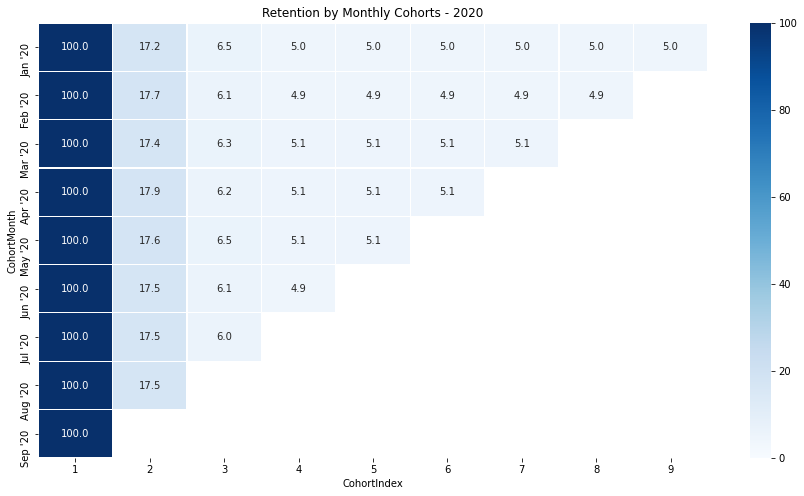

In [40]:

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts - 2020')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
            vmax = 100.0,
            fmt = '.1f',
            yticklabels=month_list,
            linewidth = 0.3)

plt.show()